<img src = 'https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true' width="240" height="360">

# <center>EDA on 1000 Movies Dataset.</center>

<img src="https://raw.githubusercontent.com/NirmalSagar/EDA_1000-Movie_df_-DataViz_INSAID/master/available-4k-movies.jpg" align='middle'><br/>

## Table of Contents

1. [**Problem Statement**](#section1)<br>
2. [**Importing Packages**](#section2)<br>
3. [**Loading Data**](#section3)<br>
  - 3.1 [Description of the 1000 Movie Dataset](#section301)<br>
  - 3.2 [Pandas Profiling before Data Preprocessing](#section302)<br>
4. [**Data Preprocessing**](#section4)<br>
  - 4.1 [Data Preprocessing of 1000 Movies Dataset](#section401)<br>
  - 4.2 [Pandas Profiling after Data Preprocessing](#section402)<br>
5. [**Exploratory Data Analysis**](#section5)<br>
  - a. [1000 Movies Histogram ](#5a)<br>
  - b. [1000 Movies Correlation Map](#5b)<br>
  - 5.1 [**Analysis based on Genre**](#section501)<br>
    - 5.1.1 [Which Genre are the most common (number of movies made in %)?](#section50101)<br>
    - 5.1.2 [What is the Revenue (Millions) per Genre per Year?](#section50102)<br>
    - 5.1.3 [What is the Votes per Genre per Year in 1000 Movies Dataset?](#section50103)<br>
    - 5.1.4 [How many Movies made per Year per Genre?](#section50104)<br>
  - 5.2 [**Analysis Based on Rating, Year and Revenue (Millions)**](#section502)<br>
      - 5.2.1 [How many movies released every year and rated above 7.5 in relation with Runtime Levels?](#section50201)<br>
      - 5.2.2 [What is the range of Revenue (Millions) of Movies generated per Year?](#section50202)<br>
      - 5.2.3 [How Revenue is related with Rating of a movie?](#section50203)<br>
      - 5.2.4 [How Rating drives the Revenue generation of a Movie?](#section50204)<br>
      - 5.2.5 [How Revenue (Million) is spread over the year?](#section50205)<br> 
      - 5.2.6 [How Rating and Metascore are inter-related?](#section50206)<br> 
      - 5.2.7 [How Revenue is affected by Vote Count?](#section50207)<br>
      - 5.2.8 [How Metascore and Rating is correlated with the Votes count?](#section50208)<br>

6. [Conclusion](#section6)
  - 6.1 [Actionable Insights](#section601)

<a id=section1></a>
## 1. Problem Statement

### Understand the trend in revenue, ratings, metascore, votes for different movie genres over years (from 2006 to 2016) and Correlation between the trends for Top genres (Drama, Action, Adventure, Animation, Comedy, Romance, Thriller, Crime, Horror, Sci-Fi, Fantacy and Musical).


<a id=section2></a>
## 2. Importing Packages

In [1]:
import numpy as np
np.set_printoptions(precision=4) # To display values only upto four decimal places. 

import pandas as pd
pd.set_option('mode.chained_assignment', None)      # To suppress pandas warnings.
pd.set_option('display.max_colwidth', -1)           # To display all the data in each column
pd.options.display.max_columns = 50                 # To display every column of the dataset in head()

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')                  # To apply seaborn whitegrid style to the plots.
%matplotlib inline

import seaborn as sns
sns.set(style='whitegrid', font_scale=1.3, color_codes=True)      # To adjust seaborn settings for the plots.

import warnings
warnings.filterwarnings('ignore')                   # To suppress all the warnings in the notebook.

In [2]:
# Importing the parallel_coordinates from pandas.plotting which will help in plotting the Parallel Coordinates.

from pandas.plotting import parallel_coordinates

In [3]:
# Install and update plotly using this command to the latest version (higher than version 4.0.0)

!pip install plotly --upgrade

Requirement already up-to-date: plotly in c:\users\dell\anaconda3\lib\site-packages (4.6.0)


In [4]:
# Install chart_studio, please use this command. 

!pip install chart-studio

In [5]:
# Making plotly specific imports
# These imports are necessary to use plotly offline without signing in to their website.

from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import chart_studio.plotly as py
from plotly import tools
init_notebook_mode(connected=True)

In [6]:
import os
from pandas import Series, DataFrame
from sklearn.metrics.pairwise import cosine_similarity, cosine_distances
import networkx as nx
import json
from pandas.io.json import json_normalize
from math import sqrt

%precision %.2f
pd.options.display.float_format = '{:,.2f}'.format

In [7]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


<a id=section3></a>
## 3. Loading Data
● The dataset is taken from the INSAID Project Dataset. It contains data of 1000 most popular movies(by IMDB rating) for the period 2006-2016.

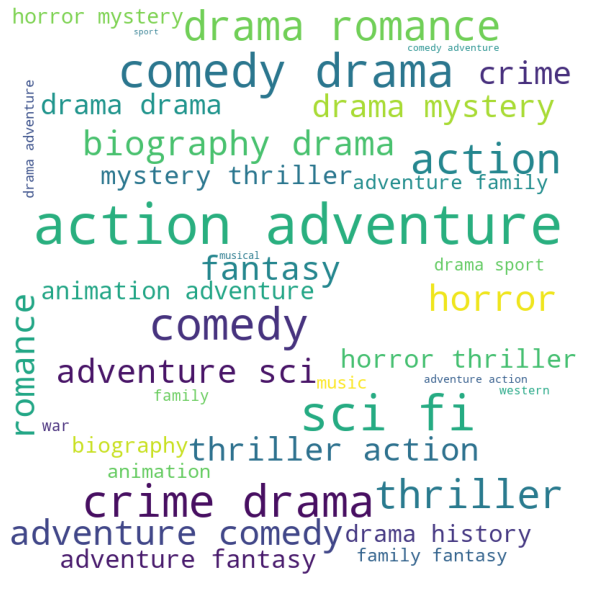

In [8]:
# importing all necessery modules 
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 
  
# Reads '1000_movie Data.csv' file  
df_1000movies = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/1000%20movies%20data.csv')
  
comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in df_1000movies.Genre: 
      
    # typecaste each val to string 
    val = str(val) 

    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 

# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

### Importing 1000 Movie Dataset

In [9]:
# Importing the 1000 Movies's dataset.

df_1000movies = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/1000%20movies%20data.csv')
# df_1000movies = pd.read_csv(r'C:\Users\DELL\1000 movies data.csv')

df_1000movies.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced to work together to stop a fanatical warrior from taking control of the universe.,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe Saldana",2014,121,8.10,757074,333.13,76.00
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a team finds a structure on a distant moon, but they soon realize they are not alone.",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fassbender, Charlize Theron",2012,124,7.00,485820,126.46,65.00
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diagnosed 23 distinct personalities. They must try to escape before the apparent emergence of a frightful new 24th.,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richardson, Jessica Sula",2016,117,7.30,157606,138.12,62.00
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling theater impresario's attempt to save his theater with a singing competition becomes grander than he anticipates even as its finalists' find that their lives will never be the same.",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth MacFarlane, Scarlett Johansson",2016,108,7.20,60545,270.32,59.00
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of the most dangerous incarcerated super-villains to form a defensive task force. Their first mission: save the world from the apocalypse.,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola Davis",2016,123,6.20,393727,325.02,40.00


In [10]:
df_1000movies.tail()        #To see the last five rows of the Dataframe.

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
995,996,Secret in Their Eyes,"Crime,Drama,Mystery","A tight-knit team of rising investigators, along with their supervisor, is suddenly torn apart when they discover that one of their own teenage daughters has been brutally murdered.",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts, Dean Norris",2015,111,6.20,27585,nan,45.00
996,997,Hostel: Part II,Horror,"Three American college students studying abroad are lured to a Slovakian hostel, and discover the grim reality behind it.",Eli Roth,"Lauren German, Heather Matarazzo, Bijou Phillips, Roger Bart",2007,94,5.50,73152,17.54,46.00
997,998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance students from different backgrounds at the Maryland School of the Arts.,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura, Adam G. Sevani",2008,98,6.20,70699,58.01,50.00
998,999,Search Party,"Adventure,Comedy",A pair of friends embark on a mission to reunite their pal with the woman he was going to marry.,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Shannon Woodward",2014,93,5.60,4881,nan,22.00
999,1000,Nine Lives,"Comedy,Family,Fantasy",A stuffy businessman finds himself trapped inside the body of his family's cat.,Barry Sonnenfeld,"Kevin Spacey, Jennifer Garner, Robbie Amell,Cheryl Hines",2016,87,5.30,12435,19.64,11.00


<a id=section301></a>
### Description of the 1000 Movie Dataset

- This dataset is a collection of **1,000 most popular movies on IMDB in the last 10 years from 2006 - 2016.**


| Column Name                    | Description                                                                                |
| -------------------------------|:------------------------------------------------------------------------------------------:| 
| Rank                           | Movie rank order.                                                                          | 
| Title                          | The title of the film.                                                                      | 
| Genre                          | A comma-separated list of genres used to classify the film.                                | 
| Description                    | Brief one-sentence movie summary.                                                          |
| Director                       | The name of the film's director.                                                            |
| Actors                         | A comma-separated list of the main stars of the film.                                      |
| Year                           | The year that the film released as an integer.                                              |
| Runtime (Minutes)              | The duration of the film in minutes.                                                        |
| Rating                         | User rating for the movie 0-10.                                                            |
| Votes                          | Number of votes.                                                                            |
| Revenue (Millions)             | Movie revenue in millions.                                                                  |
| Metascore                      | An aggregated average of critic scores. Values are between 0 and 100. Higher scores represent positive reviews.                                                       



In [11]:
df_1000movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
Rank                  1000 non-null int64
Title                 1000 non-null object
Genre                 1000 non-null object
Description           1000 non-null object
Director              1000 non-null object
Actors                1000 non-null object
Year                  1000 non-null int64
Runtime (Minutes)     1000 non-null int64
Rating                1000 non-null float64
Votes                 1000 non-null int64
Revenue (Millions)    872 non-null float64
Metascore             936 non-null float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


- ```info``` function gives us the following insights into the **df_1000movies** dataframe:

  - There are a total of **1000 Movies (rows)** and **12 columns** in the dataframe.
  
  - There are **07 columns** with a **numeric** datatype and **05 columns** with an **object** datatype.
  
  - There are **missing values in the Revenu (Million) & Metascore data** .

In [12]:
print (df_1000movies.shape)                     # check the number of rows and columns

(1000, 12)


In [13]:
df_1000movies.dtypes                            # Display the data type for each variable

Rank                  int64  
Title                 object 
Genre                 object 
Description           object 
Director              object 
Actors                object 
Year                  int64  
Runtime (Minutes)     int64  
Rating                float64
Votes                 int64  
Revenue (Millions)    float64
Metascore             float64
dtype: object

In [14]:
df_1000movies.describe()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,"1,000.00","1,000.00","1,000.00","1,000.00","1,000.00",872.00,936.00
mean,500.50,"2,012.78",113.17,6.72,"169,808.26",82.96,58.99
std,288.82,3.21,18.81,0.95,"188,762.65",103.25,17.19
min,1.00,"2,006.00",66.00,1.90,61.00,0.00,11.00
25%,250.75,"2,010.00",100.00,6.20,"36,309.00",13.27,47.00
50%,500.50,"2,014.00",111.00,6.80,"110,799.00",47.98,59.50
75%,750.25,"2,016.00",123.00,7.40,"239,909.75",113.72,72.00
max,"1,000.00","2,016.00",191.00,9.00,"1,791,916.00",936.63,100.00


- ```Describe```  function gives us the following insights into the 1000_movies dataframe:

  - The data describes that is is for 1000 movie titles for **2006-2016**.
  - The minimum revuenue is **0 million which is highly unlikely but possible if movie not released in theatres or suffered huge losses**.
  - As observed above, for **Revenue column, the third quartile(75 %) has value of approx 113 million USD, but the max value is approx 936 million USD**, so it seems few movies have earned much higher or can consider **outliar** than remaining movies.
  - For Revenue, the **mean is greater than median**, so data seems to be **right skewed.

<a id=section302></a>
### 3.2 Pandas Profiling before Data Preprocessing

- Here, we will perform **Pandas Profiling before preprocessing** our dataset, so we will name the **output file** as __1000_Movies_profiling_before_preprocessing.html__. 

In [15]:
# To install pandas profiling please run this command.

!pip install pandas-profiling --upgrade

Requirement already up-to-date: pandas-profiling in c:\users\dell\anaconda3\lib\site-packages (2.6.0)


In [16]:
import pandas_profiling 

In [ ]:
# To output pandas profiling report to an external html file.
# Saving the output as 1000_Movie_profiling_before_preprocessing.html

Movie_profile = df_1000movies.profile_report(title = "Movies's Profiling before Data Preprocessing")
Movie_profile.to_file(output_file = "1000_Movie_profiling_before_preprocessing.html")

**Observations from Pandas Profiling before Data Processing**
__Dataset info__:
- Number of variables: 12
- Number of observations: 1000
- Missing cells: 192 (1.6%)

__Variables types__: 
- Numeric = 7
- Categorical = 5

__High cardinality Columns are__: 
- **Title** has a **high cardinality: 999 distinct values** 
- **Genre** has a **high cardinality: 207 distinct values** 
- **Description** has a **high cardinality: 1000 distinct values** 
- **Director** has a **high cardinality: 644 distinct values**
- **Actors** has a **high cardinality: 996 distinct values** 

__Missing values Columns are__:
- **Revenue (Millions)** has **128 (12.8%) missing values**
- **Metascore** has **64 (6.4%) missing values**

__Genre, Director & Actors__:
- There are 207 Genre types, 644 Directors and 996 Actors in this dataset.(these numbers would have changed if we had discarded the NaN values.)
- The most frequent Genre type is Action,Adventure,Sci-Fi having 50 counts and on individual node Movies containing Drama is highly preffered and the most frequent Director is Ridley Scott having 8 movies in the data.

__Movie Durations__:
- The mean movie duration is 113 minutes. The shortest movie was 66 minutes long and the longest movie was 2.5 hours for the movie lovers. Half of the movies had a duration less than 111 minutes and 75% of them less than 2 hours.

__Movie Ratings__:
- The average rating is 6.7. Half of the movies were rated below 6.8 while 75% of them below 7.4.
- The worst movie had a poor rating of 1.9 while the best movie was rated with 9 points.

__Votes__:
- The IMDB community is pretty active, as we will see:
- The mean number of votes is 169.808. The lowest number of votes is 61 and the highest is 1.791.916 .
- Half of the movies have less than 110.799 votes and 75% of them less than 239.909

__Revenue (Millions)__:
- We see that the mean Revenue is almost 83 million dollars. The highest revenue is almost a billion dollars (937 million)
- 25% of the movies had a revenue below 13 million, half of them below 48 million and 75% of them below 114 million dollars.

__Metascore__:
- The Metascores range is between 11(worst) to 100(best). Half of the metascore values are below 59.5 and 75% of them below 72.
- The mean metascore is 58.98 points

<a id=section4></a>
## 4. Data Preprocessing

- Here we will perform **Data Preprocessing on 1000 Movie** dataset, to make the data usable for **EDA**.


- In order to avoid any errors, please run **Pandas Profiling** before running the code below.

In [ ]:
df_1000movies.head()                                # It gives the Top 5 Movie Dataset

#### Observations:
- Since the column **Description** is **descriptive is nature / the brief story content, don't provide any additonal insight for now in our analysis** for all the samples, we will drop this column.

**Note:** Dropping of "Descriptive" column doesn't mean it don't have insight, it can provide great information on  more complex analysis.

In [ ]:
df_1000movies.drop(['Description'], axis=1, inplace=True)     # To drop the Description Column

In [ ]:
df_1000movies.head(2)                                         # Check Data

#### Check Duplicate Data in a Data-Frame

In [ ]:
# Check Duplicate Data in a Data-Frame
# "The Host" multiple entries are of 2 different movies released in different year, so no redundant entry found for it.
duplicate_rows_df = df_1000movies[df_1000movies.duplicated()]
print ("number of duplicate rows: ", duplicate_rows_df.shape)

In [ ]:
# Removing columns name contains spaces, where dot version won’t work, is any space in Column name.
df_1000movies.rename(columns={
        'Runtime (Minutes)': 'Runtime', 
        'Revenue (Millions)': 'Revenue_millions'
}, inplace=True)

In [ ]:
print (df_1000movies.columns)                                 # To print the all Column Names

In [ ]:
# df_1000movies.set_index('title')

In [ ]:
# df_1000movies.columns = map(str.Lower, df_1000movies.columns)  # map() function returns a list of results after applying the given function
                                                               # to each item of a given iterable.
df_1000movies.dtypes                                           # Confirm that all variable names are now lower case

#### Handling missing Values

In [ ]:
# Impute with missing value 0 on Metascore, as the few Nan Values. 
df_1000movies['Metascore'] = df_1000movies['Metascore'].fillna(0)   

In [ ]:
# Filling the missing values with the mean value
df_1000movies['Revenue_millions'].fillna(df_1000movies['Revenue_millions'].mean(), inplace=True)

In [ ]:
df_1000movies.info()

<a id=section402></a>
### 4.2 Pandas Profiling after Data Preprocessing

- Here, we will perform **Pandas Profiling after preprocessing** our dataset, so we will name the **output file** as __1000_movies_profiling_after_preprocessing.html__.

In [ ]:
# To output pandas profiling report to an external html file.
# Saving the output as 1000_Movie_profiling_after_preprocessing.html

Movie_profile = df_1000movies.profile_report(title = "Movies's Profiling after Data Preprocessing")
Movie_profile.to_file(output_file = "1000_Movie_profiling_after_preprocessing.html")

**Observations from Pandas Profiling after Data Processing** <br><br>
__1000_Movies_Dataset info__:
- Number of variables: 11
- Number of observations: 1000
- Missing cells: 0 (0.0%)


__Variables types__: 
- Numeric = 7
- Categorical = 4

<a id=section5></a>
## 5. Exploratory Data Analysis

**Exploratory Data Analysis(EDA)** is an **approach to analyzing data sets** to **summarize** their **main characteristics**, often with **visual methods**. 

- It includes **cleaning, munging, combining, reshaping, slicing, dicing, and transforming data** for **analysis** purpose.

<a id=5a></a>
## 1000 Movies Histogram Map

In [ ]:
# Look at histograms to get idea of how variables are distrubuted (overall)
df_1000movies.hist(color='DarkBlue',figsize= (12,12));
plt.rc('font', size=8)

**All variables are skewed. The only variable that is uniformly distributed is Rank.** <br><br>

<a id=5b></a>
## 1000 Movies Correlation Map

Text(0.5, 1.0, 'Relation between 1000 Movie dataset fields')

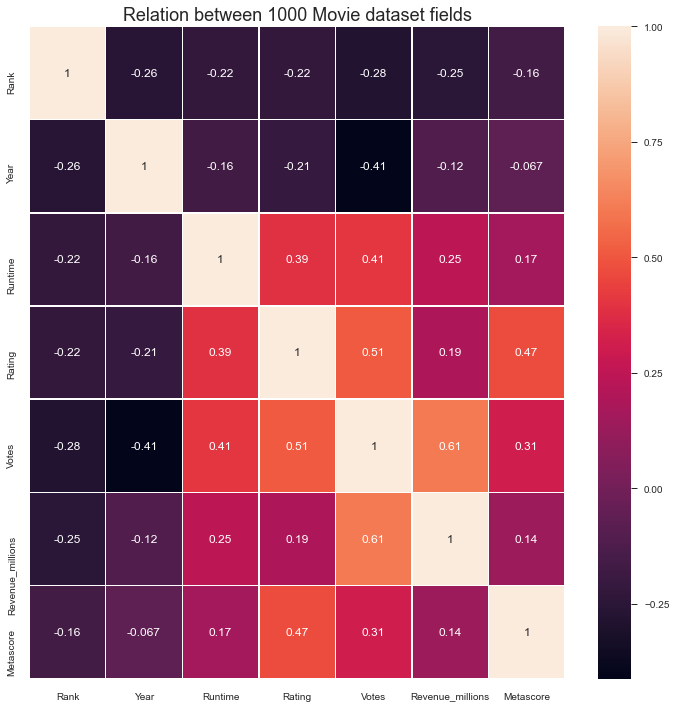

In [29]:
corr = df_1000movies.corr()
figure = plt.figure(figsize=(12,12))
plt.rc('font', size=12)
sns.heatmap(data=corr, annot=True, linewidths=.5, xticklabels=True, yticklabels=True).set_title("Relation between 1000 Movie dataset fields", fontsize=18)

#### Observations:
- **In the above map we see strong correlation is between Rating and Metascore (0.47), Votes and Rating (0.51) and top in order is between Revenue (Millions) and Votes (0.61)**.

<a id=section501></a>
## 5.1 Analysis Based on Genre

In [30]:
df_1000movies['Genre'].value_counts()

Action,Adventure,Sci-Fi    50
Drama                      48
Comedy,Drama,Romance       35
Comedy                     32
Drama,Romance              31
                           ..
Comedy,Drama,Musical       1 
Drama,Family,Fantasy       1 
Action,Fantasy,War         1 
Comedy,Horror,Romance      1 
Drama,Family,Music         1 
Name: Genre, Length: 207, dtype: int64

In [31]:
# Only keep columns that are needed for further analysis using movie title as index
md = df_1000movies[['Rank','Title','Genre', 'Director', 'Actors', 'Year', 'Runtime', 'Rating','Votes','Revenue_millions','Metascore']]

In [32]:
# Split genres and create a new entry for each of the genre a movie falls into
s = md['Genre'].str.split(',').apply(Series, 1).stack()
s.index = s.index.droplevel(-1)
s.name = 'Genre'
del md['Genre']
md_split_genres = md.join(s)

In [33]:
# Check result
md_split_genres.head()

,Rank,Title,Director,Actors,Year,Runtime,Rating,Votes,Revenue_millions,Metascore,Genre
0,1,Guardians of the Galaxy,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe Saldana",2014,121,8.10,757074,333.13,76.00,Action
0,1,Guardians of the Galaxy,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe Saldana",2014,121,8.10,757074,333.13,76.00,Adventure
0,1,Guardians of the Galaxy,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe Saldana",2014,121,8.10,757074,333.13,76.00,Sci-Fi
1,2,Prometheus,Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fassbender, Charlize Theron",2012,124,7.00,485820,126.46,65.00,Adventure
1,2,Prometheus,Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fassbender, Charlize Theron",2012,124,7.00,485820,126.46,65.00,Mystery


In [34]:
md_split_genres['Genre'].isnull().sum()

0

<a id=section50101></a>
### 5.1.1 Which genres are the most common (number of movies made in % )?

In [35]:
# How many different genres do we have?
md_split_genres['Genre'].unique()

array(['Action', 'Adventure', 'Sci-Fi', 'Mystery', 'Horror', 'Thriller',
       'Animation', 'Comedy', 'Family', 'Fantasy', 'Drama', 'Music',
       'Biography', 'Romance', 'History', 'Crime', 'Western', 'War',
       'Musical', 'Sport'], dtype=object)

In [36]:
# Group movies by genre using title as unique identifier and display all genres.
md_genre = (pd.DataFrame(md_split_genres.groupby('Genre').Title.nunique())).sort_values('Title', ascending= True)
md_genre.head(20)

,Title
Genre,
Musical,5
Western,7
War,13
Music,16
Sport,18
History,29
Animation,49
Family,51
Biography,81


###### Movies as per Genre in %

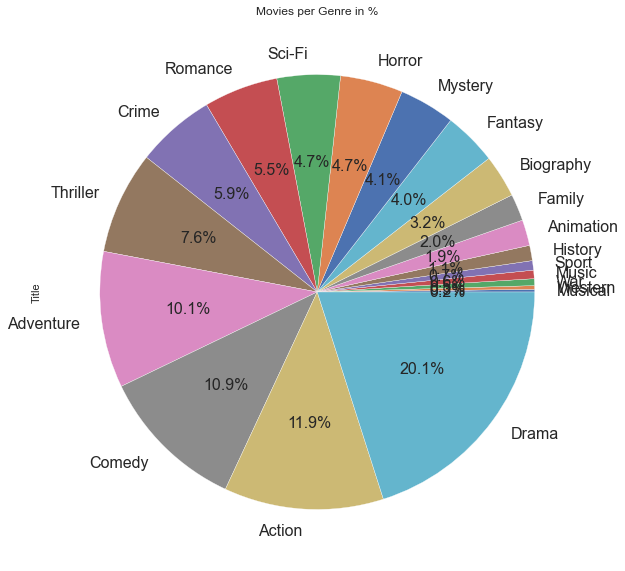

In [37]:
md_genre['Title'].plot.pie(title= 'Movies per Genre in %', figsize=(10,10), autopct='%1.1f%%',fontsize=16);

##### Movie as per Genre in bar chart

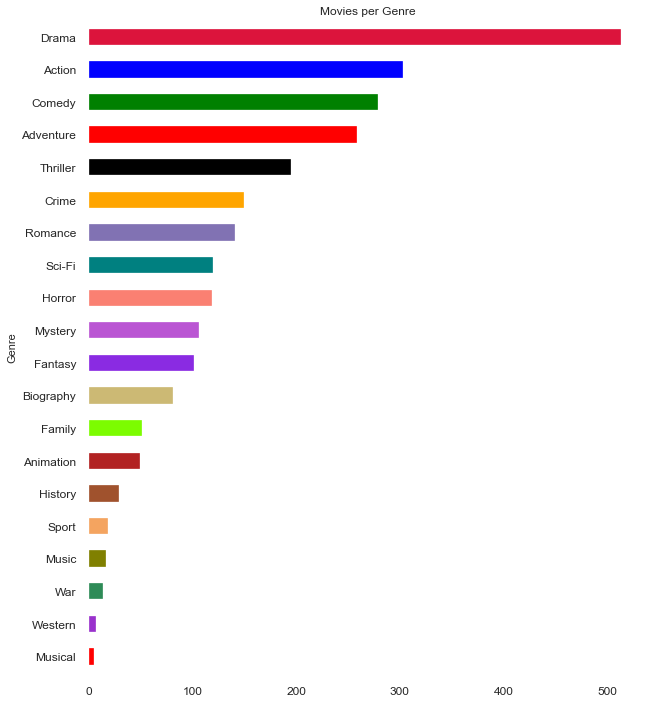

In [38]:
md_genre['Title'].plot.barh(title = 'Movies per Genre',color= ['red', 'darkorchid', 'seagreen', 'olive', 'sandybrown', 'sienna', 'firebrick', 'lawngreen', 'y', 'blueviolet', 'mediumorchid', 'salmon', 'teal', 'm', 'orange', 'black', 'red', 'green', 'blue', 'crimson'], figsize=(10, 12), fontsize=12);
plt.rc('font', size=8) 

#### Observations:
- **In the above 2 plots, movies which contain genre like Drama, Action, Comedy, adventure and Thriller are highly produced and on percentage basis Drama (20.1%) is on the top.** <br>

In [39]:
md_split_genres.shape

(2555, 11)

##### Analysis of development of means of variables per genre over the years

In [40]:
md_split_genres.head()

,Rank,Title,Director,Actors,Year,Runtime,Rating,Votes,Revenue_millions,Metascore,Genre
0,1,Guardians of the Galaxy,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe Saldana",2014,121,8.10,757074,333.13,76.00,Action
0,1,Guardians of the Galaxy,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe Saldana",2014,121,8.10,757074,333.13,76.00,Adventure
0,1,Guardians of the Galaxy,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe Saldana",2014,121,8.10,757074,333.13,76.00,Sci-Fi
1,2,Prometheus,Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fassbender, Charlize Theron",2012,124,7.00,485820,126.46,65.00,Adventure
1,2,Prometheus,Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fassbender, Charlize Theron",2012,124,7.00,485820,126.46,65.00,Mystery


In [41]:
# Create data frame grouped by genres AND release year, get means of variables of interest
md_year_genre_mean = pd.DataFrame(md_split_genres.groupby(['Year','Genre'])['Revenue_millions', 'Rating', 'Votes','Metascore', 'Runtime'].mean())
md_year_genre_mean.head()


Revenue_millions  Rating      Votes  Metascore  Runtime
Year Genre                                                             
2006 Action    158.82            6.88    323,606.64 56.18      125.27  
     Adventure 123.02            7.07    271,047.62 61.46      125.31  
     Animation 221.02            6.80    212,293.00 75.00      112.50  
     Biography 61.34             7.23    177,644.33 68.67      120.00  
     Comedy    76.34             6.82    157,379.33 64.92      107.25

<a id=section50102></a>
### 5.1.2 What is the Avg. Revenue (Millions) per Genre per Year?

In [42]:
# Taking the mean of Revenue (Millions) per Genre per Year
md_year_genre_revenue = pd.DataFrame(md_split_genres.groupby(['Year','Genre'])['Revenue_millions'].mean())
md_year_genre_revenue

Revenue_millions
Year Genre                      
2006 Action    158.82           
     Adventure 123.02           
     Animation 221.02           
     Biography 61.34            
     Comedy    76.34            
...              ...            
2016 Sci-Fi    118.81           
     Sport     35.94            
     Thriller  55.84            
     War       28.51            
     Western   88.17            

[195 rows x 1 columns]

In [43]:
# Below pivot data to get the shape that is necessary for a heatmap that displays genres, years and avg. Revenue per genre per year
md_heat_revenue_pivot = pd.pivot_table(md_year_genre_revenue, values='Revenue_millions', index=['Genre'], columns=['Year'])
md_heat_revenue_pivot.head()

Year,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Genre,,,,,,,,,,,
Action,158.82,145.39,131.27,192.46,111.77,122.57,140.51,121.99,138.25,141.18,78.51
Adventure,123.02,153.28,159.57,179.45,169.50,157.61,172.58,184.10,157.45,164.93,114.58
Animation,221.02,138.77,219.61,123.41,246.60,167.53,213.34,345.76,176.85,259.88,143.51
Biography,61.34,47.24,15.69,129.94,86.91,44.39,159.11,83.78,113.78,36.14,37.05
Comedy,76.34,109.30,77.44,99.59,105.79,68.81,88.21,93.63,58.02,70.68,65.08


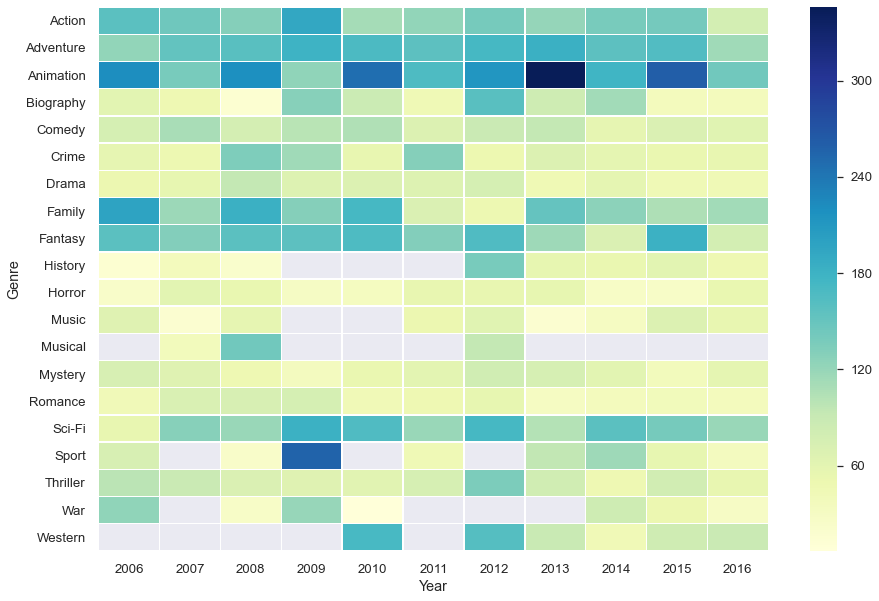

In [44]:
# Below pivot data is to get the shape that is necessary for a heatmap that displays genres, years and avg. revenue per genre per year
md_heat_revenue_pivot = pd.pivot_table(md_year_genre_revenue, values='Revenue_millions', index=['Genre'], columns=['Year'])

# Display Heatmap
sns.set(rc={'figure.figsize':(15,10)})
sns.set(font_scale=1.2)                        # To modify the font-size of the chart
sns.heatmap(md_heat_revenue_pivot, linewidths=.5, cmap='YlGnBu');

#### Observations:
- Above plot shows a **strong increase for Adventure, Animation, Family, and Science Fiction over the years. We can also observe in the year 2013, Animated movies are highly Revenue (Millions) generated movies**.

<a id=section50103></a>
### 5.1.3 What is the Avg. Votes per Genre per Year of 1000 Movies dataset?

In [45]:
# Taking the mean of Avg.Votes per Genre per Year
md_year_genre_votes = pd.DataFrame(md_split_genres.groupby(['Year','Genre'])['Votes'].mean())
md_year_genre_votes

Votes
Year Genre               
2006 Action    323,606.64
     Adventure 271,047.62
     Animation 212,293.00
     Biography 177,644.33
     Comedy    157,379.33
...                   ...
2016 Sci-Fi    120,538.95
     Sport     3,889.00  
     Thriller  29,112.10 
     War       7,391.33  
     Western   67,928.50 

[195 rows x 1 columns]

In [46]:
# Below pivot data to get the shape that is necessary for a heatmap that displays genres, years and avg. vote per genre per year
md_heat_votes_pivot = pd.pivot_table(md_year_genre_votes, values='Votes', index=['Genre'], columns=['Year'])
md_heat_votes_pivot.head()

Year,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Genre,,,,,,,,,,,
Action,"323,606.64","310,020.25","328,580.08","354,519.29","290,759.68","307,313.70","335,742.71","278,025.14","264,904.95","185,032.94","86,672.43"
Adventure,"271,047.62","315,255.73","331,703.73","369,808.39","338,004.35","298,185.22","346,572.00","316,359.32","300,971.93","218,807.42","111,821.65"
Animation,"212,293.00","266,986.00","553,342.50","281,020.50","404,310.80","142,204.50","292,250.00","336,283.33","215,911.75","180,780.75","69,856.56"
Biography,"177,644.33","249,087.75","110,877.75","170,183.67","407,138.50","427,680.00","344,385.50","291,333.30","243,762.00","99,348.67","34,991.39"
Comedy,"157,379.33","256,398.90","178,550.08","256,997.00","221,947.39","198,528.53","212,035.52","218,536.52","138,587.37","98,413.76","51,636.31"


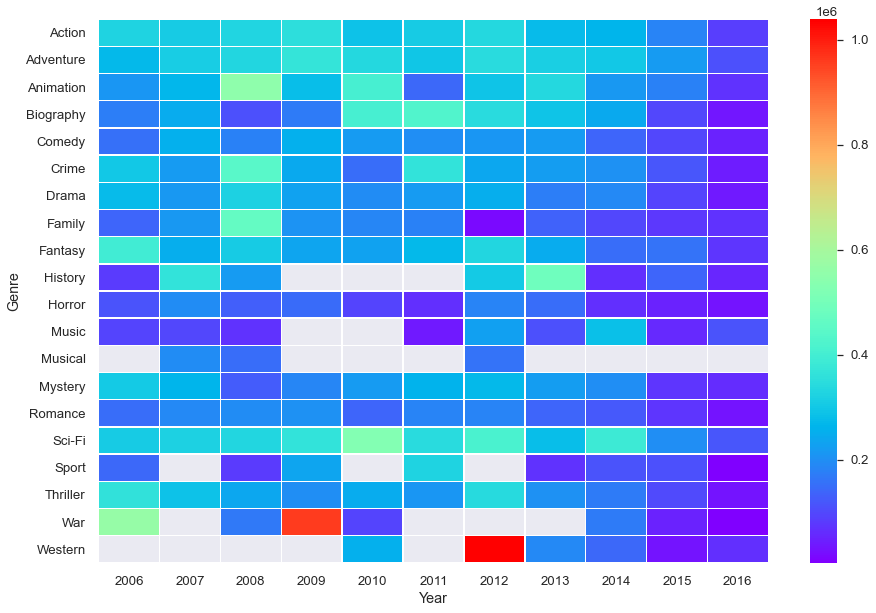

In [47]:
# Below pivot data is to get the shape that is necessary for a heatmap that displays genres, years and avg. votes per Genre per year
md_heat_votes_pivot = pd.pivot_table(md_year_genre_votes, values='Votes', index=['Genre'], columns=['Year'])

# Display Heatmap
sns.set(rc={'figure.figsize':(15,10)})
sns.set(font_scale=1.2)
sns.heatmap(md_heat_votes_pivot, linewidths=.5, cmap= 'rainbow');

#### Observations:
- In the above heat map we can see **in 2012 people casted the maximum votes on  Genre of fiction called Western and also, showed there interest towards Sci-Fi Genre movies.**
- We can say that as the number of movies has increased of variegated Genre, user's votes are also diversified, which will cause a drop in average revenue per year. 

<a id=section50104></a>
### 5.1.4 How many Movies made per Year per Genre?

In [48]:
# Get movies made per year, create new data frame
md_year = pd.DataFrame(md_split_genres.groupby('Year').Title.nunique())
md_year.head(11)

,Title
Year,
2006,44
2007,53
2008,52
2009,51
2010,60
2011,63
2012,64
2013,91
2014,98


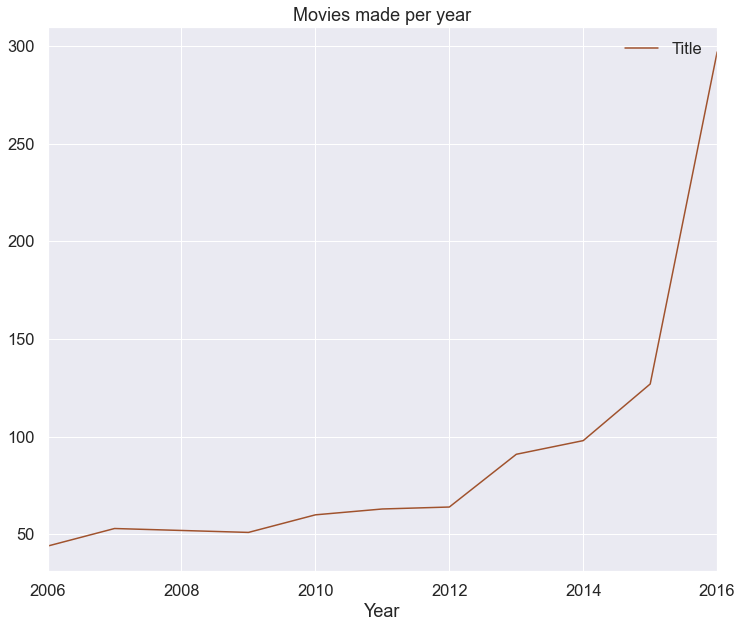

In [60]:
# Below Plot data, line chart for showing development over the years
md_year.plot.line(title = 'Movies made per year',color='sienna', figsize=(12, 10));

#### Observations:
- **We can see that over years more and more movies were made per year. Starting at just 44 movies in 2006 up to 127 per year in 2015 with a max of 297 movies in 2016.** 
- We can say as various types of Genre are introduced and clubed together, the movies made per year is increasing. 

In [50]:
# Get mean of variables grouped by year (new data frame) in order to see what changed
md_year_mean = md_split_genres.groupby('Year').mean()
md_year_mean.head()

,Rank,Runtime,Rating,Votes,Revenue_millions,Metascore
Year,,,,,,
2006,577.37,120.99,7.11,"270,593.45",87.29,59.72
2007,582.74,122.68,7.18,"248,276.12",88.89,57.15
2008,627.16,112.10,6.81,"279,564.64",103.06,54.23
2009,579.51,117.69,7.03,"267,873.94",115.94,56.45
2010,593.59,111.30,6.80,"251,086.78",106.62,58.79


<a id=section502></a>
## 5.2 Analysis Based on Rating, Year, Runtime and Revenue (Millions)

<a id=section50201></a>
### 5.2.1 How many movies released every year and rated above 7.5 in relation with Runtime Levels?

In [51]:
# Use the Pandas cut method to map the Runtime into the above levels
runtime_bin_edges = [66, 100, 111, 123, 187]
runtime_bin_names = ['Short', 'Medium', 'Moderately Long', 'Long']
md['Runtime_levels'] = pd.cut(md.Runtime, runtime_bin_edges, labels=runtime_bin_names)
md.head()

,Rank,Title,Director,Actors,Year,Runtime,Rating,Votes,Revenue_millions,Metascore,Runtime_levels
0,1,Guardians of the Galaxy,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe Saldana",2014,121,8.10,757074,333.13,76.00,Moderately Long
1,2,Prometheus,Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fassbender, Charlize Theron",2012,124,7.00,485820,126.46,65.00,Long
2,3,Split,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richardson, Jessica Sula",2016,117,7.30,157606,138.12,62.00,Moderately Long
3,4,Sing,Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth MacFarlane, Scarlett Johansson",2016,108,7.20,60545,270.32,59.00,Medium
4,5,Suicide Squad,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola Davis",2016,123,6.20,393727,325.02,40.00,Moderately Long


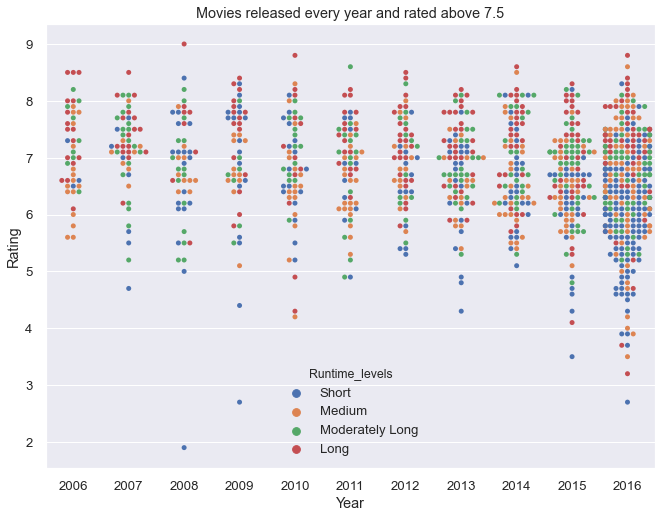

In [52]:
# To plot a Swarmplot for Rating and Year for Movie Dataset.
plt.figure(figsize=(10,8))
sns.swarmplot(y='Rating', x='Year', hue="Runtime_levels", data=md).set_title('Movies released every year and rated above 7.5')
sns.set(font_scale=1.5)
plt.tight_layout(pad=2.0)
plt.show()

# plt.savefig('Swarmplot for Rating and Year for Movie Dataset', format='jpeg', dpi=70) 

#### Observations:
- We can notice from the above analysis that **Movies released every year is gradually increaseing YoY so the rating too where users rated short movies (Blue dots) the most followed by medium & Long (Orange & Red dots).**


<a id=section50202></a>
### 5.2.2 What is the range of Revenue (Millions) of Movies generated per Year?

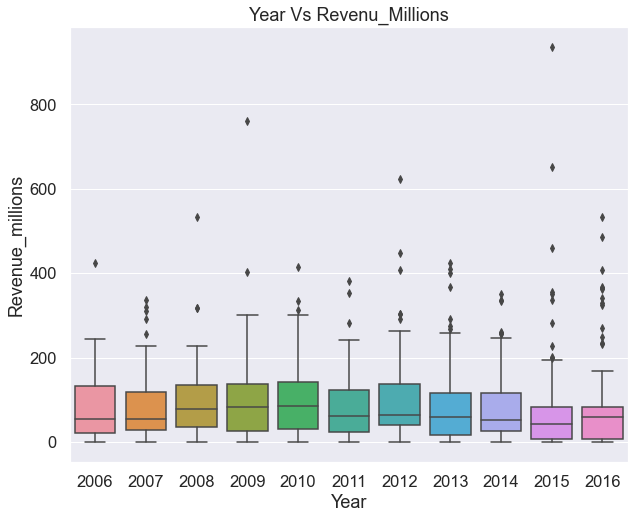

In [53]:
plt.figure(figsize=(10,8))
sns.boxplot(x='Year', y='Revenue_millions', data=md).set_title('Year Vs Revenu_Millions')
plt.show()

#### Observations:
- In the above Boxplot , we can see **the spread of movie's revenue generated every year lies in between 0-300 (millions) aprox., where there are many outliers per year.** In the **year 2016 most of the movies have the revenue in between 0-180 millions, but there are many outliers as wellas compared to other years.**  

<a id=section50203></a>
### 5.2.3 How Revenue is related with Rating of a movie?

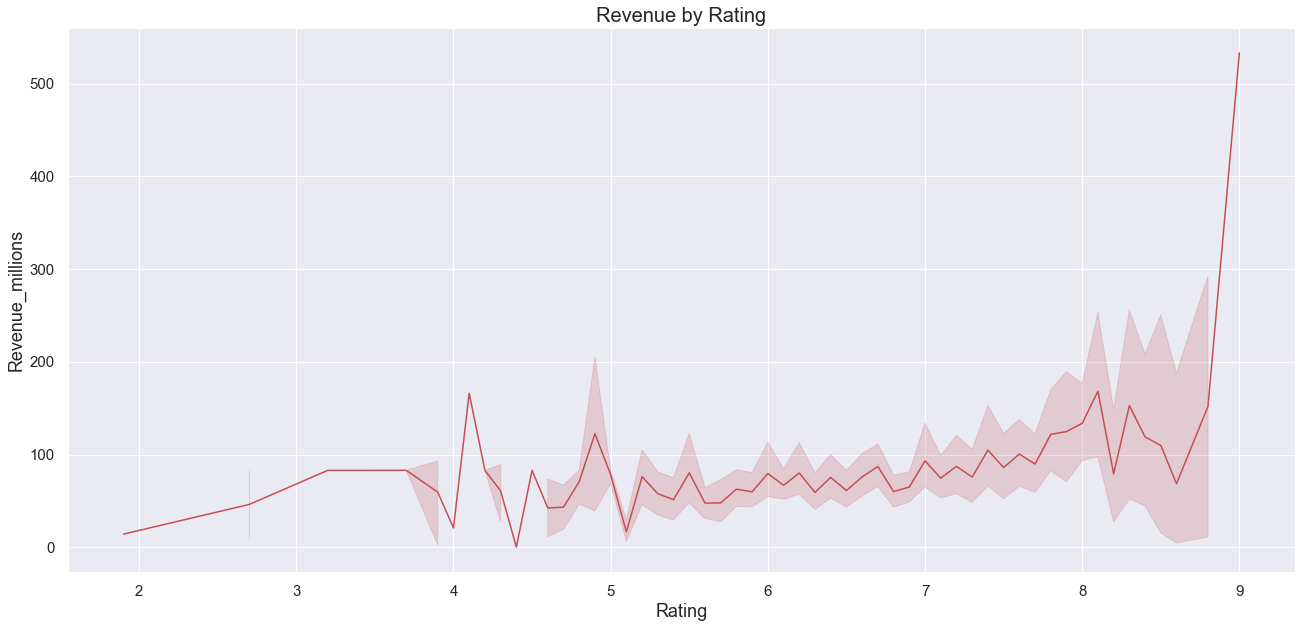

In [54]:
plt.figure(figsize=(22,10))
plt.title('Revenue by Rating',fontsize=20)
sns.lineplot(md.Rating,md.Revenue_millions,color='r')
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

#### Observations:
- In terms of business/revenue of movie, it strongly depends and related to rating, where user predict, if the movie is highly rating it is worth watching it. Which in return increases the revenue.    
- So, in the above plot we can observe as the movie rating is above 8.5, revenue crosses 500M.

<a id=section50204></a>
### 5.2.4 How Rating drives the Revenue generation of a Movie?

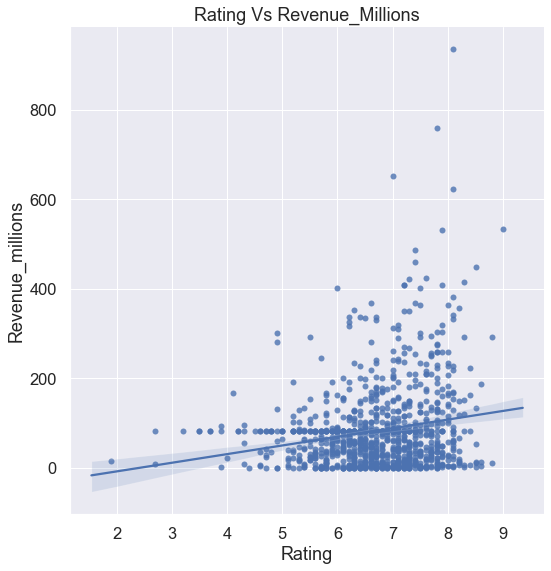

In [55]:
sns.set_style("darkgrid")
sns.lmplot(data= df_1000movies, x="Rating", y="Revenue_millions", height=8)

plt.title("Rating Vs Revenue_Millions" )
plt.show()

#### Observations:
- In the above scatter plot we can observe how the rating drives the revenue, as the movies rated in between 6 to 8, the revenue generated is in between 0-150M approx. 
- But, if the rating by the user is higher like in between 7.5 to 9.0, there is high rise on revenue aswell. This can be a exceptional.

In [56]:
md.head()

,Rank,Title,Director,Actors,Year,Runtime,Rating,Votes,Revenue_millions,Metascore,Runtime_levels
0,1,Guardians of the Galaxy,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe Saldana",2014,121,8.10,757074,333.13,76.00,Moderately Long
1,2,Prometheus,Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fassbender, Charlize Theron",2012,124,7.00,485820,126.46,65.00,Long
2,3,Split,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richardson, Jessica Sula",2016,117,7.30,157606,138.12,62.00,Moderately Long
3,4,Sing,Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth MacFarlane, Scarlett Johansson",2016,108,7.20,60545,270.32,59.00,Medium
4,5,Suicide Squad,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola Davis",2016,123,6.20,393727,325.02,40.00,Moderately Long


<a id=section50205></a>
### 5.2.5 How Revenue (Million) is spread over the year?

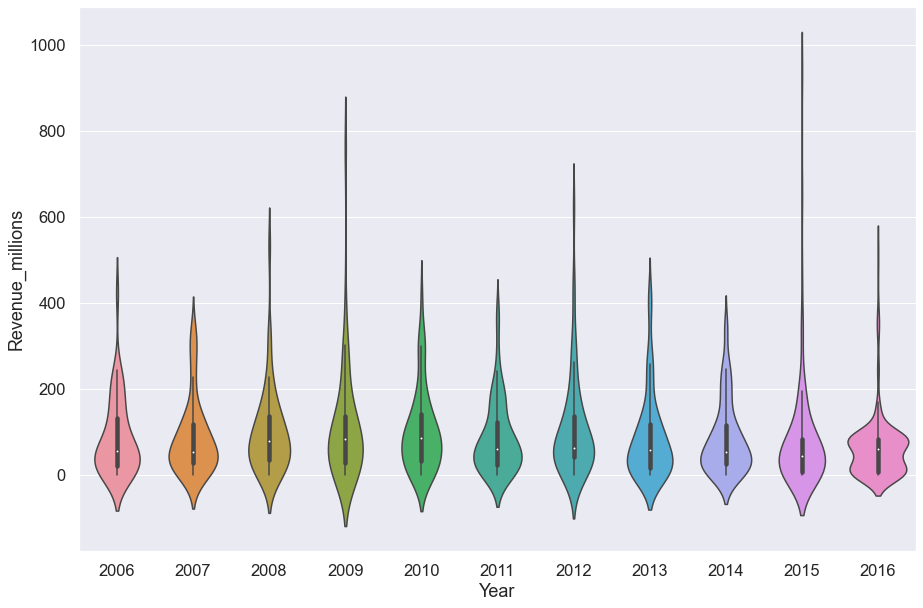

In [57]:
# Draw a Violin Plot Year Vs Revenue 
sns.violinplot(x='Year', y='Revenue_millions', data=md)

#### Observations:
- In the violin plot we can see the spread of Revenue data over the year. we can figure out 2016 is the highest in revenue, as in the above analsis it is high in movie production. 

<a id=section50206></a>
### 5.2.6 How Rating and Metascore are inter-related?

In [124]:
df_1000movies.nlargest(10, 'Metascore')

,Rank,Title,Genre,Director,Actors,Year,Runtime,Rating,Votes,Revenue_millions,Metascore
656,657,Boyhood,Drama,Richard Linklater,"Ellar Coltrane, Patricia Arquette, Ethan Hawke,Elijah Smith",2014,165,7.90,286722,25.36,100.00
41,42,Moonlight,Drama,Barry Jenkins,"Mahershala Ali, Shariff Earp, Duan Sanderson, Alex R. Hibbert",2016,111,7.50,135095,27.85,99.00
230,231,Pan's Labyrinth,"Drama,Fantasy,War",Guillermo del Toro,"Ivana Baquero, Ariadna Gil, Sergi López,Maribel Verdú",2006,118,8.20,498879,37.62,98.00
21,22,Manchester by the Sea,Drama,Kenneth Lonergan,"Casey Affleck, Michelle Williams, Kyle Chandler,Lucas Hedges",2016,137,7.90,134213,47.70,96.00
111,112,12 Years a Slave,"Biography,Drama,History",Steve McQueen,"Chiwetel Ejiofor, Michael Kenneth Williams, Michael Fassbender, Brad Pitt",2013,134,8.10,486338,56.67,96.00
489,490,Ratatouille,"Animation,Comedy,Family",Brad Bird,"Brad Garrett, Lou Romano, Patton Oswalt,Ian Holm",2007,111,8.00,504039,206.44,96.00
509,510,Gravity,"Drama,Sci-Fi,Thriller",Alfonso Cuarón,"Sandra Bullock, George Clooney, Ed Harris, Orto Ignatiussen",2013,91,7.80,622089,274.08,96.00
324,325,The Social Network,"Biography,Drama",David Fincher,"Jesse Eisenberg, Andrew Garfield, Justin Timberlake,Rooney Mara",2010,120,7.70,510100,96.92,95.00
406,407,Zero Dark Thirty,"Drama,History,Thriller",Kathryn Bigelow,"Jessica Chastain, Joel Edgerton, Chris Pratt, Mark Strong",2012,157,7.40,226661,95.72,95.00
501,502,Carol,"Drama,Romance",Todd Haynes,"Cate Blanchett, Rooney Mara, Sarah Paulson, Kyle Chandler",2015,118,7.20,77995,0.25,95.00


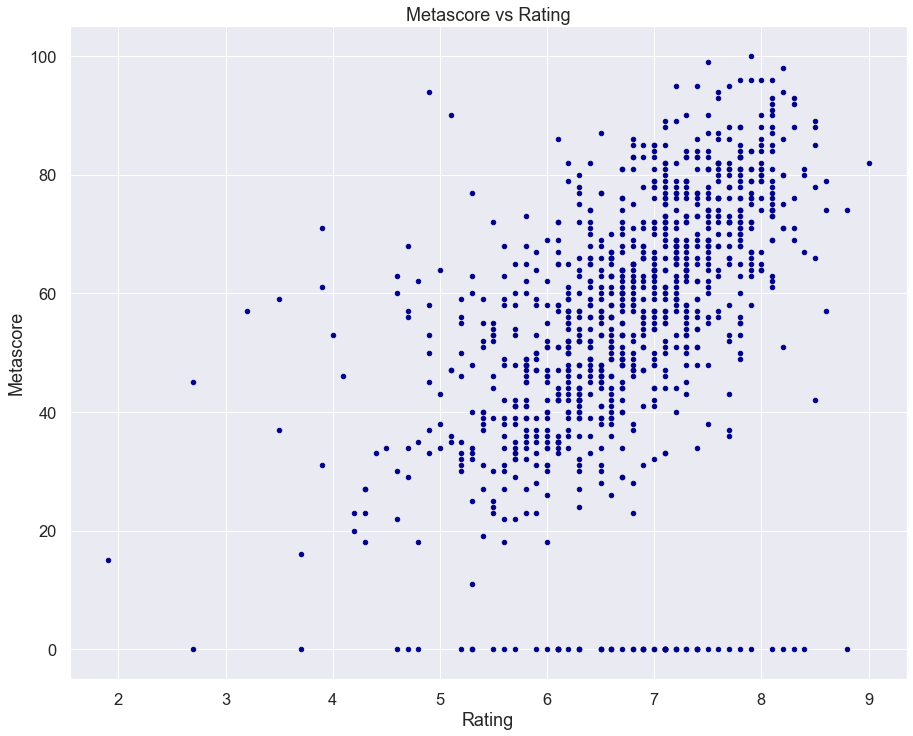

In [76]:
# Plot a scatter plotin between Metascore vs Rating 
md.plot.scatter(x='Rating', y='Metascore',title='Metascore vs Rating',color='DarkBlue',figsize=(15,12));


#### Observations:
- Above chart shows how Rating & Metascore are related to each other, we can see all movies rated in between 6 to 8 have more critics's reviews.
- Higher the Rating, higher is critics's reviews (Metascore), higher is the revenue.

<a id=section50207></a>
### 5.2.7 How Revenue is affected by Vote Count?

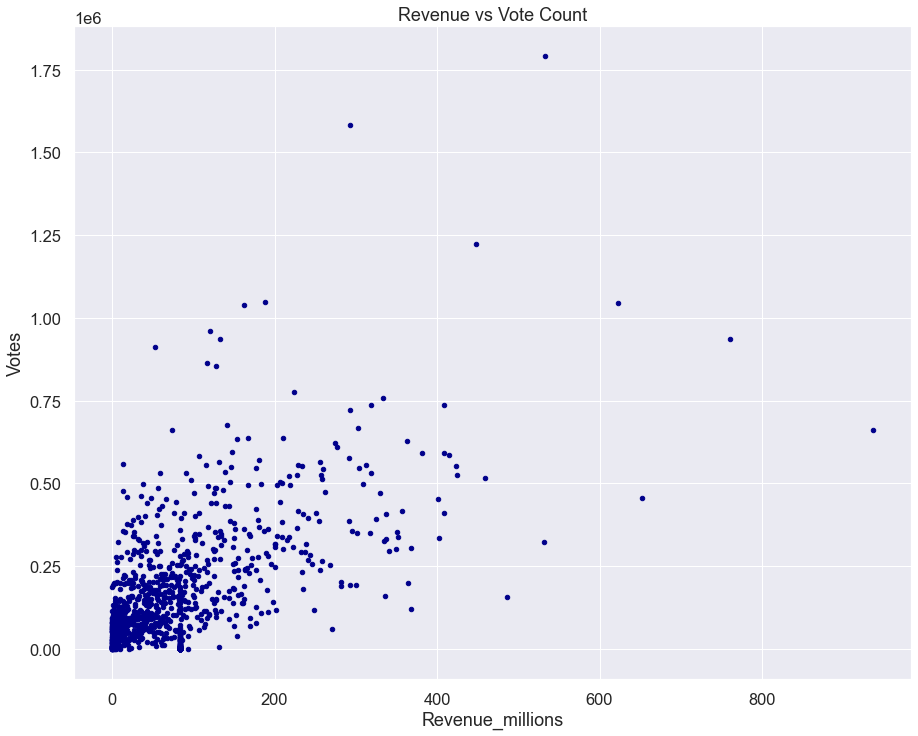

In [126]:
md.plot.scatter(x='Revenue_millions', y='Votes',title='Revenue vs Vote Count', color='DarkBlue', figsize=(15,12));

#### Observations:
- Most of the movies around 100-150 million have votes_count under 250000, as the Vote count goes high the so is the revenue but it is not often.
- There are movies with revenue more the 800M with votes 60K approx., and movies with 400-600M with votes 1.75M+. 

<a id=section50208></a>
### 5.2.8 How Metascore and Rating is correlated with the Votes count?

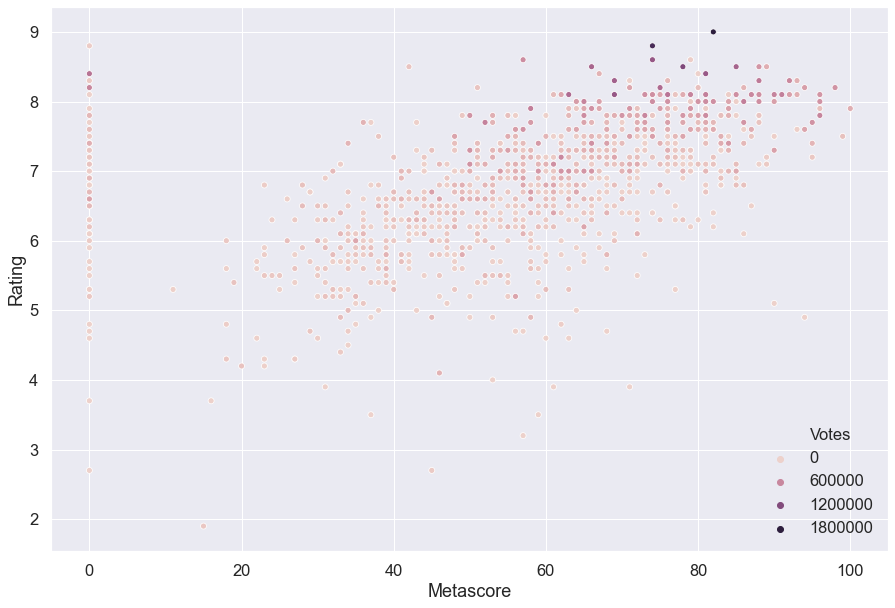

In [163]:
#Corelation between Metascore and rating of the movies
sns.scatterplot(x=md['Metascore'], y=md['Rating'], hue = md['Votes'])
plt.show()

#### Observations:
- As per the above analysis **Metascore, Rating and Votes count go somewhat hand-in-hand**. The **dark spots shows high vote count for Metascore (80+) and Rating (8.5 - 9)**.

<a id=section6></a>
## 6. Conclusion

__After analyzing the 1000 movies data, following is the conclusion of the observation__-

- As the Genre count increases in a movie, its Revenue, Rating and Metascore are on the rise. However, revenue is significantly high for movies with Genre count of 3.

- The most popular Genre is Drama and the Genre combination of "Animation, Drama, Fantasy" earns the highest Rating. Also Drama is popular among Critics as well, with the Genre combination of "Drama, Fantasy, War" earning the highest Metascore. Where War,Musical and Western genre are lowest earners.

- Average revenue per genre in past few year is been segregated the total revenue and Votes too, as the number of movies releasing has been increased over the years.

- In the coming era the Genre combination of "Drama, Adventure, Action, sci-fi, Thriller + Fantasy" will be highly liked and good in terms of business growth.

- Number or the total_no of movies increased over the years, which could be the reason in decreased average revenue.

- Short lenght movies or medium length are highly preposed/preferred by the users.

<a id=section601></a>
### 6.1 Actionable Insights

__If you’re looking to dive into the ultimate film Genre, Director/Actors, Runtime, below are the insight to be kept in mind__:
- There should be mixed bags of Adventure, Drama, Animation, Sci-fi /Thriller and lot Action, which drive the user Crazy...

- Produce movies with active directors & famous most liked Actors/Actress, as it is changing trend in nature. We can say that a particular Director is going to perform business drive in a liner fashion similar with cast of the movie. Becoz, direction depends on different parameters like story, budget, crew, technology and many more.
Similar with Cast as they fluctuate in a timely & Trendy fashion.

- Produce movies that have runtime not more than 2-2nhalf hours, lengthy the movie, user get exhausted. if you have noticed, NetFlix and other entertainment groups have introduced series with multiple episodes of 40-45 mins runtime.

- Produce movies that will satisfy both People and Critics, for a business prospective & growth. As to shorten the research factor user usually visit critics reviews/rating section from various online channels to conclude to watch movie.